In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2 as cv
import torch
import os
from tqdm import tqdm
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 43.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Training on {device}')

model = YOLO('yolov8n.pt').to(device)

Training on cuda


100%|██████████| 6.25M/6.25M [00:00<00:00, 268MB/s]


In [ ]:
model.info(True)

layer                                     name  gradient   parameters                shape         mu      sigma
    0                      model.0.conv.weight     False          432        [16, 3, 3, 3]   -0.00279      0.152 torch.float32
    1                        model.0.bn.weight     False           16                 [16]       2.97       1.86 torch.float32
    2                          model.0.bn.bias     False           16                 [16]      0.249       4.17 torch.float32
    3                      model.1.conv.weight     False         4608       [32, 16, 3, 3]   -0.00012      0.063 torch.float32
    4                        model.1.bn.weight     False           32                 [32]       5.02       1.12 torch.float32
    5                          model.1.bn.bias     False           32                 [32]      0.942        1.5 torch.float32
    6                  model.2.cv1.conv.weight     False         1024       [32, 32, 1, 1]     -0.011     0.0906 torch.float3

(225, 3157200, 0, 8.8575488)

In [ ]:
for name, param in model.named_parameters():
        if 'model.22' not in name:  # Assuming the detect module is model.22
            param.requires_grad = False
        else:
            print(f"Training: {name}")

Training: model.model.22.cv2.0.0.conv.weight
Training: model.model.22.cv2.0.0.bn.weight
Training: model.model.22.cv2.0.0.bn.bias
Training: model.model.22.cv2.0.1.conv.weight
Training: model.model.22.cv2.0.1.bn.weight
Training: model.model.22.cv2.0.1.bn.bias
Training: model.model.22.cv2.0.2.weight
Training: model.model.22.cv2.0.2.bias
Training: model.model.22.cv2.1.0.conv.weight
Training: model.model.22.cv2.1.0.bn.weight
Training: model.model.22.cv2.1.0.bn.bias
Training: model.model.22.cv2.1.1.conv.weight
Training: model.model.22.cv2.1.1.bn.weight
Training: model.model.22.cv2.1.1.bn.bias
Training: model.model.22.cv2.1.2.weight
Training: model.model.22.cv2.1.2.bias
Training: model.model.22.cv2.2.0.conv.weight
Training: model.model.22.cv2.2.0.bn.weight
Training: model.model.22.cv2.2.0.bn.bias
Training: model.model.22.cv2.2.1.conv.weight
Training: model.model.22.cv2.2.1.bn.weight
Training: model.model.22.cv2.2.1.bn.bias
Training: model.model.22.cv2.2.2.weight
Training: model.model.22.cv2.2

In [ ]:
model.info(True)

layer                                     name  gradient   parameters                shape         mu      sigma
    0                      model.0.conv.weight     False          432        [16, 3, 3, 3]   -0.00279      0.152 torch.float32
    1                        model.0.bn.weight     False           16                 [16]       2.97       1.86 torch.float32
    2                          model.0.bn.bias     False           16                 [16]      0.249       4.17 torch.float32
    3                      model.1.conv.weight     False         4608       [32, 16, 3, 3]   -0.00012      0.063 torch.float32
    4                        model.1.bn.weight     False           32                 [32]       5.02       1.12 torch.float32
    5                          model.1.bn.bias     False           32                 [32]      0.942        1.5 torch.float32
    6                  model.2.cv1.conv.weight     False         1024       [32, 32, 1, 1]     -0.011     0.0906 torch.float3

(225, 3157200, 0, 8.8575488)

In [35]:
results = model.train(data='/content/drive/MyDrive/YOLO_detection/weapon_data/data.yaml',
        epochs= 120,
        imgsz=1024,
        batch=32,
        name='train_detect_module',
        freeze=[f'model.{i}' for i in range(22)],
        augment=True,
        visualize=True,
        single_cls = True)

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/YOLO_detection/weapon_data/data.yaml, epochs=120, time=None, patience=100, batch=32, imgsz=1024, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train_detect_module7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=['model.0', 'model.1', 'model.2', 'model.3', 'model.4', 'model.5', 'model.6', 'model.7', 'model.8', 'model.9', 'model.10', 'model.11', 'model.12', 'model.13', 'model.14', 'model.15', 'model.16', 'model.17', 'model.18', 'model.19', 'model.20', 'model.21'], multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=F

train: Scanning /content/drive/MyDrive/YOLO_detection/weapon_data/labels/train.cache... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/YOLO_detection/weapon_data/labels/val.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to runs/detect/train_detect_module7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train_detect_module7
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      10.9G       1.15     0.9663      1.206         25       1024: 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

                   all         10         10      0.711        0.6      0.626      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      10.8G      1.166     0.9328       1.19         32       1024: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all         10         10      0.584      0.565      0.577      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      10.8G      1.023     0.9016      1.118         25       1024: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         10         10      0.574        0.7      0.628      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      10.8G     0.9004       0.71      1.019         29       1024: 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         10         10      0.489        0.4       0.43      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      10.8G     0.8732      0.682      1.086         24       1024: 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         10         10       0.53        0.5      0.406      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      10.8G     0.8624     0.6869      1.048         30       1024: 100%|██████████| 3/3 [00:02<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         10         10      0.529        0.5      0.499      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      10.8G     0.9543     0.6981      1.111         38       1024: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         10         10      0.592        0.4      0.487      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      10.8G     0.8344     0.6435       1.04         28       1024: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all         10         10        0.8        0.5      0.583      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      10.8G     0.8698     0.7376      1.073         25       1024: 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         10         10      0.802        0.5        0.6      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      10.8G     0.8794     0.6381      1.056         34       1024: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         10         10      0.847        0.7      0.765       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      10.8G     0.7765     0.6088     0.9816         31       1024: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         10         10      0.874      0.697       0.74      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      10.8G     0.8329     0.6779     0.9897         24       1024: 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         10         10      0.952        0.6      0.722      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      10.8G     0.8076     0.6121     0.9891         34       1024: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         10         10      0.667        0.7      0.701      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      10.8G      0.838     0.6022     0.9986         34       1024: 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         10         10      0.722        0.8      0.796      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      10.8G     0.8106     0.6084     0.9783         29       1024: 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         10         10      0.574        0.7      0.555      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      10.8G      0.827      0.653     0.9375         28       1024: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         10         10      0.658        0.6        0.6       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      10.8G     0.8309     0.6329      1.016         28       1024: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         10         10      0.837        0.6      0.645      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      10.8G     0.8211     0.6083      1.024         26       1024: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]

                   all         10         10      0.863        0.7      0.677      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      10.8G     0.7806     0.5926     0.9878         27       1024: 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         10         10      0.734        0.7      0.639      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      10.9G     0.8372     0.6383      0.945         34       1024: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         10         10      0.773        0.7      0.607      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      10.8G     0.7714     0.5884     0.9686         26       1024: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         10         10      0.868        0.7      0.667      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      10.8G     0.7659     0.6114     0.9437         27       1024: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         10         10      0.694      0.681      0.613      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      10.8G     0.8684     0.6076      1.035         30       1024: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         10         10      0.725        0.6       0.59      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      10.8G     0.8878     0.6344      1.052         26       1024: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         10         10      0.679        0.7      0.657      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      10.8G     0.8011     0.6071     0.9665         30       1024: 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         10         10      0.856      0.596      0.675      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      10.8G     0.8199     0.6339     0.9665         33       1024: 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         10         10      0.924        0.5      0.594      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      10.8G     0.7626     0.5816      0.917         26       1024: 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         10         10      0.906        0.5        0.6      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      10.8G     0.7845      0.586     0.9473         22       1024: 100%|██████████| 3/3 [00:01<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]

                   all         10         10       0.96        0.6       0.72      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      10.8G     0.7903     0.5743      1.002         24       1024: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         10         10      0.952        0.6      0.692      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      10.8G     0.7821     0.5791      0.983         28       1024: 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all         10         10      0.968        0.6      0.704      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      10.8G     0.8908      0.616      1.023         27       1024: 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         10         10      0.965        0.6      0.696      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      10.8G     0.8534     0.6386      1.011         38       1024: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         10         10      0.669      0.606      0.705      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      10.8G     0.8288     0.6092      1.009         30       1024: 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         10         10      0.828        0.5      0.689      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      10.8G     0.7557      0.586     0.9368         34       1024: 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         10         10      0.744        0.6      0.677      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      10.8G     0.8064     0.6074     0.9586         30       1024: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         10         10      0.854      0.588      0.717       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      10.8G     0.7499     0.5667     0.9392         28       1024: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         10         10      0.798        0.6      0.737      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      10.8G       0.74     0.5764     0.9469         38       1024: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         10         10      0.621        0.8       0.75      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      10.8G     0.7877     0.6017     0.9947         31       1024: 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]

                   all         10         10      0.877        0.8       0.82      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      10.8G     0.7676      0.617     0.9987         31       1024: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         10         10      0.768      0.664      0.705      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      10.8G     0.8093     0.5994      0.974         34       1024: 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         10         10      0.952        0.5      0.649      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      10.8G     0.7078     0.5552     0.9368         33       1024: 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         10         10      0.858        0.7      0.722      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      10.8G     0.8275     0.6288      1.004         28       1024: 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         10         10      0.888      0.793       0.75      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      10.8G     0.8125      0.616     0.9631         32       1024: 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         10         10       0.71        0.8      0.711      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      10.8G     0.8098     0.6175     0.9554         34       1024: 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         10         10      0.856        0.7      0.741      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      10.8G     0.7863     0.5896     0.9577         33       1024: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         10         10       0.75      0.898      0.832      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      10.8G     0.8671     0.6035     0.9986         38       1024: 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         10         10      0.844        0.7       0.79      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      10.8G     0.7961     0.5518     0.9746         30       1024: 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         10         10      0.838        0.7      0.745       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      10.8G     0.7032     0.5316     0.9068         34       1024: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         10         10      0.877        0.8      0.779      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      10.8G     0.7641     0.5826     0.9533         32       1024: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         10         10      0.862        0.8      0.763      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      10.8G     0.7797     0.6001      0.985         34       1024: 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         10         10      0.808        0.7      0.732      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      10.8G      0.827     0.5657     0.9678         31       1024: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         10         10      0.749        0.7      0.706      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      10.8G     0.7946     0.6227     0.9825         30       1024: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         10         10      0.886      0.782      0.774      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      10.8G     0.8179     0.6016     0.9667         37       1024: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         10         10      0.845        0.7      0.728      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      10.8G     0.7418     0.5453     0.9566         32       1024: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         10         10      0.774      0.686      0.702      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      10.8G     0.7233     0.5484      0.933         36       1024: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all         10         10      0.693      0.679      0.722      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      10.8G     0.7792     0.5863      0.969         36       1024: 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all         10         10      0.888        0.5       0.65      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      10.8G       0.69      0.505     0.8977         25       1024: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


                   all         10         10      0.805        0.5      0.645      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      10.8G     0.6598     0.5055      0.926         25       1024: 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         10         10       0.57        0.8      0.722       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      10.8G     0.7339     0.5394     0.9118         26       1024: 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         10         10      0.617        0.7      0.706      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      10.8G     0.7826     0.5724     0.9687         24       1024: 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         10         10      0.727        0.8      0.766      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      10.8G     0.6994     0.5354     0.8989         22       1024: 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         10         10      0.786        0.8      0.779      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      10.8G     0.7435     0.5441      0.928         35       1024: 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         10         10      0.889      0.797      0.794       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      10.8G      0.696     0.5378     0.9577         23       1024: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         10         10      0.828        0.8      0.807      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      10.8G     0.7045     0.5264     0.9427         27       1024: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         10         10      0.752        0.8       0.71       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      10.8G     0.6717     0.5105     0.9353         27       1024: 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         10         10      0.758        0.8      0.691      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      10.8G      0.683     0.4958     0.9089         34       1024: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.71it/s]

                   all         10         10      0.767      0.661      0.657      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      10.8G     0.6833     0.4938     0.8605         30       1024: 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         10         10      0.771        0.7      0.654      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      10.8G      0.733      0.553     0.9532         29       1024: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         10         10      0.774        0.8      0.718      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      10.8G     0.6639     0.5094     0.9225         33       1024: 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         10         10      0.684        0.8       0.68      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      10.8G     0.6394     0.4951     0.8806         26       1024: 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         10         10      0.611      0.787      0.664      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      10.8G     0.7081     0.5419     0.9407         27       1024: 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         10         10      0.517        0.8      0.625      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      10.8G     0.5872     0.5007     0.9118         28       1024: 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         10         10      0.722        0.8      0.714      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      10.8G     0.6411     0.4973     0.9249         27       1024: 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         10         10      0.713        0.8      0.719      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      10.8G     0.6486     0.4919     0.8893         29       1024: 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         10         10      0.786        0.8      0.743       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      10.8G     0.6435     0.4971     0.9555         24       1024: 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         10         10      0.783        0.8       0.74      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      10.8G     0.6333      0.507     0.9043         28       1024: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         10         10      0.695        0.7      0.677      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      10.8G     0.6907     0.5033     0.9278         29       1024: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         10         10      0.825        0.5      0.696      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      10.8G     0.6138     0.4567     0.9066         31       1024: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         10         10       0.73        0.6      0.666      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      10.8G     0.6982     0.5163     0.9052         27       1024: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         10         10       0.73        0.6      0.662      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      10.8G     0.6888     0.5051     0.9505         28       1024: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         10         10      0.735        0.6      0.662       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      10.8G     0.7162     0.5241      0.952         24       1024: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         10         10      0.737        0.6      0.677      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      10.8G     0.6172     0.5064     0.9215         32       1024: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         10         10      0.765        0.7      0.703      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      10.8G     0.6095     0.4708     0.9224         24       1024: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         10         10      0.762        0.7      0.688      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      10.8G     0.6268     0.4714      0.902         20       1024: 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         10         10      0.728        0.7      0.695      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      10.8G     0.6854     0.5132     0.9241         29       1024: 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]

                   all         10         10       0.72        0.7      0.703      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      10.8G      0.696     0.5343     0.9352         19       1024: 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         10         10      0.758      0.628      0.722      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      10.8G     0.6387     0.4987     0.9095         33       1024: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all         10         10      0.859      0.609      0.733      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      10.8G     0.5639     0.4365     0.8831         31       1024: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         10         10      0.932        0.6      0.726      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      10.8G     0.5941     0.4546     0.9332         27       1024: 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         10         10      0.949        0.6      0.729      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      10.8G     0.6074     0.4515     0.8871         30       1024: 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         10         10      0.871      0.675      0.732      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      10.8G     0.5981     0.4504     0.8656         32       1024: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         10         10          1      0.766      0.853      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      10.8G     0.5716     0.4484     0.8848         37       1024: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]

                   all         10         10      0.985        0.8      0.857      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      10.8G     0.6142     0.4657     0.9272         26       1024: 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]


                   all         10         10      0.947        0.8      0.867      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      10.8G     0.6222     0.4853     0.8954         30       1024: 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         10         10      0.619        0.6      0.607      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      10.8G     0.6603     0.4879     0.9133         25       1024: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         10         10      0.796        0.5      0.594      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      10.8G     0.5709     0.4622     0.8878         30       1024: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         10         10      0.533        0.7      0.604      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      10.8G     0.5859     0.4307     0.8675         32       1024: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         10         10      0.532        0.7      0.633      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      10.8G     0.6362     0.4956     0.9307         29       1024: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         10         10      0.531        0.7      0.611      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      10.8G     0.5807     0.4508     0.8954         27       1024: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all         10         10      0.532        0.7      0.615       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      10.8G     0.5396     0.4354     0.8717         34       1024: 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         10         10      0.533        0.7      0.586      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      10.8G     0.5731     0.4613     0.8804         22       1024: 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         10         10      0.568      0.789      0.619      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      10.8G     0.5662     0.4303     0.8873         26       1024: 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         10         10      0.525        0.7      0.567      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      10.8G      0.587     0.4632     0.8899         30       1024: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         10         10      0.605        0.8      0.605       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      10.8G     0.6399     0.5104     0.9362         30       1024: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         10         10      0.787        0.8       0.76      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      10.8G     0.5827     0.4601     0.8768         34       1024: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         10         10      0.715        0.8      0.713        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      10.8G     0.5955     0.4654     0.9102         26       1024: 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         10         10      0.688        0.8      0.713      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      10.8G     0.6149     0.4792     0.9289         24       1024: 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         10         10      0.676        0.8      0.712      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      10.8G     0.5667     0.4527     0.8841         38       1024: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         10         10      0.693        0.7      0.736      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      10.8G     0.5404     0.4425     0.8783         33       1024: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all         10         10      0.689        0.7      0.735      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      10.8G     0.5989     0.4599     0.9154         24       1024: 100%|██████████| 3/3 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         10         10      0.691        0.7       0.74       0.34


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      10.8G     0.5799     0.4464       0.88         14       1024: 100%|██████████| 3/3 [00:06<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         10         10       0.72      0.773      0.747      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      10.8G     0.5599     0.4125     0.8896         14       1024: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         10         10      0.651        0.8      0.728      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      10.8G     0.5899     0.4258     0.9045         15       1024: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         10         10      0.707        0.8      0.753      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      10.8G     0.5776     0.4186     0.8873         14       1024: 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         10         10       0.71        0.8      0.761      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      10.8G     0.5258     0.3993     0.8536         14       1024: 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         10         10      0.716        0.8      0.762       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      10.8G     0.4807     0.4015     0.8184         16       1024: 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]

                   all         10         10      0.723      0.786      0.761      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      10.8G     0.5443     0.4263     0.8612         14       1024: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         10         10      0.723      0.784      0.762      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      10.8G     0.5433     0.4073     0.8607         15       1024: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


                   all         10         10      0.643        0.8      0.752      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      10.8G     0.5014     0.4195     0.8474         16       1024: 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         10         10      0.644        0.8      0.726      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      10.8G     0.5079     0.4089     0.8318         16       1024: 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         10         10      0.724      0.788      0.735      0.329



120 epochs completed in 0.156 hours.
Optimizer stripped from runs/detect/train_detect_module7/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/train_detect_module7/weights/best.pt, 5.7MB

Validating runs/detect/train_detect_module7/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


                   all         10         10      0.752        0.7      0.745      0.405
Speed: 0.3ms preprocess, 75.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train_detect_module7


In [36]:
print("Precision\t  Recall\tmAP50\t\tmAP95")
results.class_result(0)

Precision	  Recall	mAP50		mAP95


(0.7524014755496237, 0.7, 0.7454037267080744, 0.40453312629399585)

In [37]:
predictions = model.predict(source="/content/drive/MyDrive/YOLO_detection/weapon_data/images/test", conf = 0.58)


image 1/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im16.jpg: 1024x1024 (no detections), 93.3ms
image 2/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im2.jpg: 1024x1024 2 Gunss, 42.4ms
image 3/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im31.jpg: 1024x1024 (no detections), 39.8ms
image 4/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im33.jpg: 1024x1024 2 Gunss, 38.2ms
image 5/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im45.jpg: 1024x1024 1 Guns, 33.5ms
image 6/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im61.jpg: 1024x1024 (no detections), 35.0ms
image 7/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im62.jpg: 1024x1024 1 Guns, 32.9ms
image 8/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im64.jpg: 1024x1024 1 Guns, 32.5ms
image 9/10 /content/drive/MyDrive/YOLO_detection/weapon_data/images/test/im66.jpg: 1024x1024 1 Guns, 27.5ms

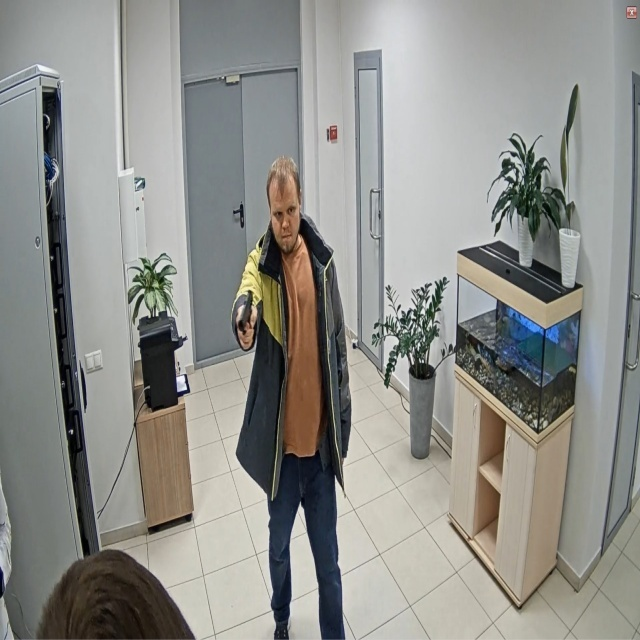

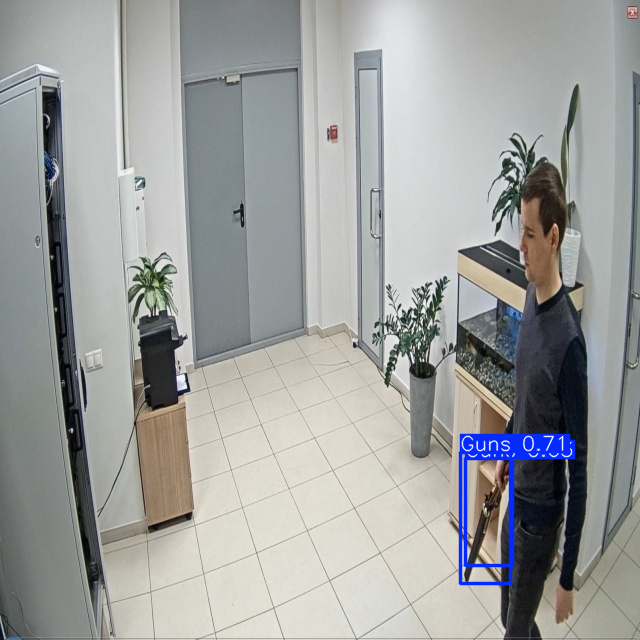

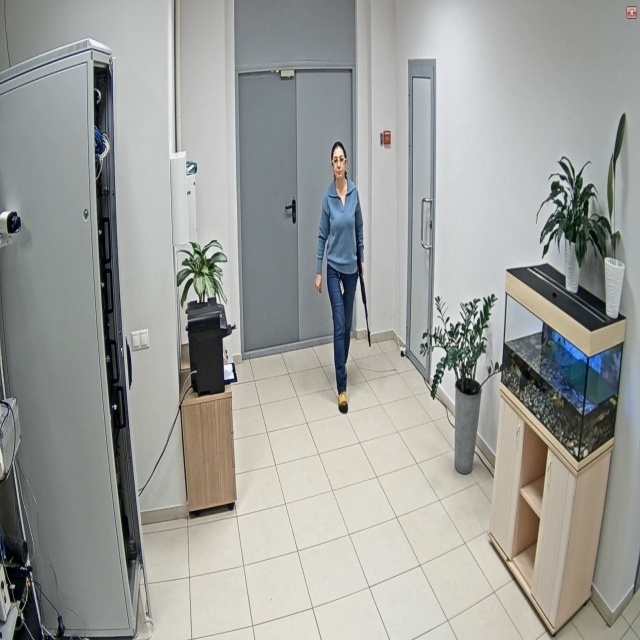

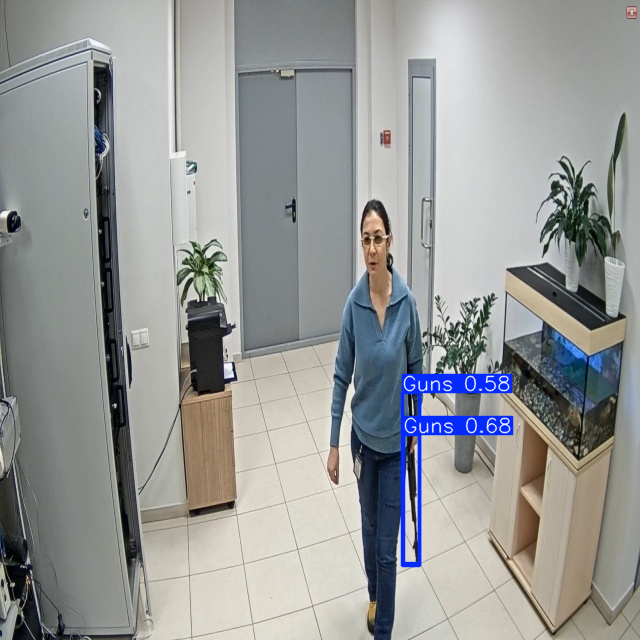

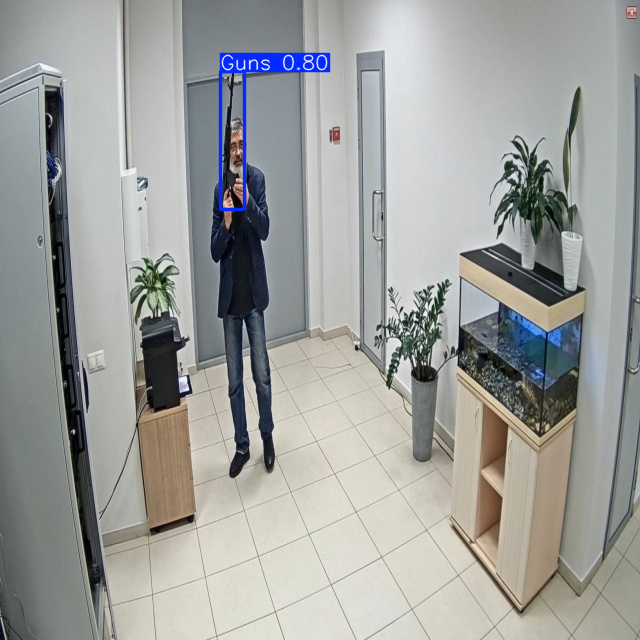

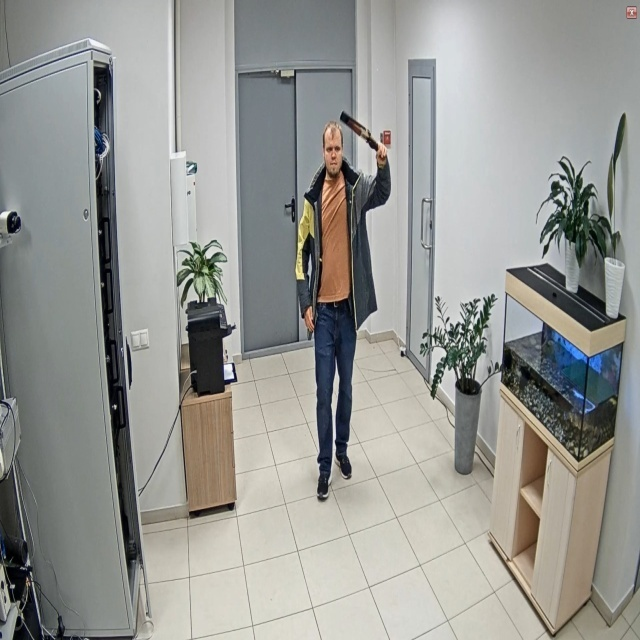

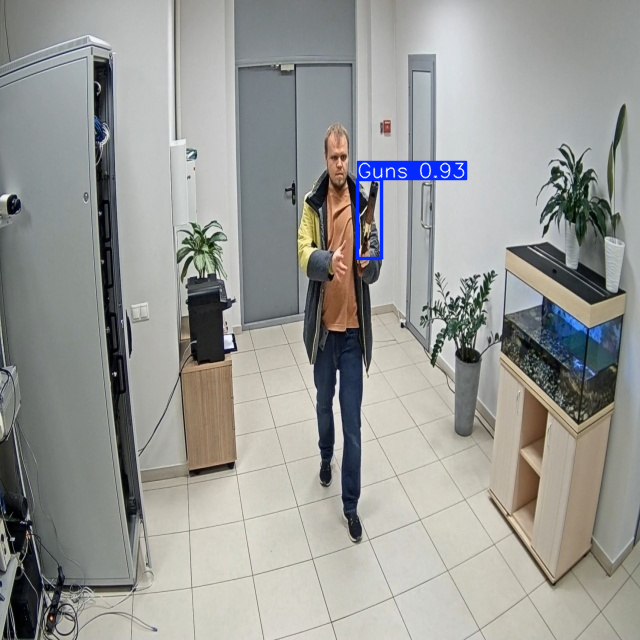

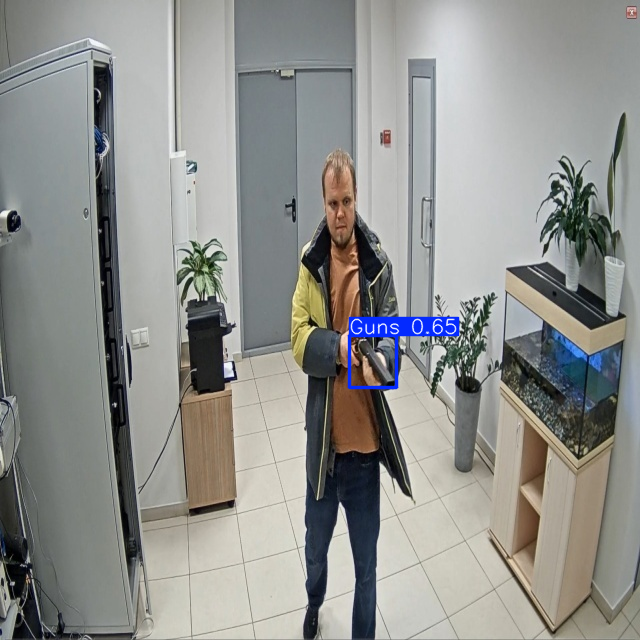

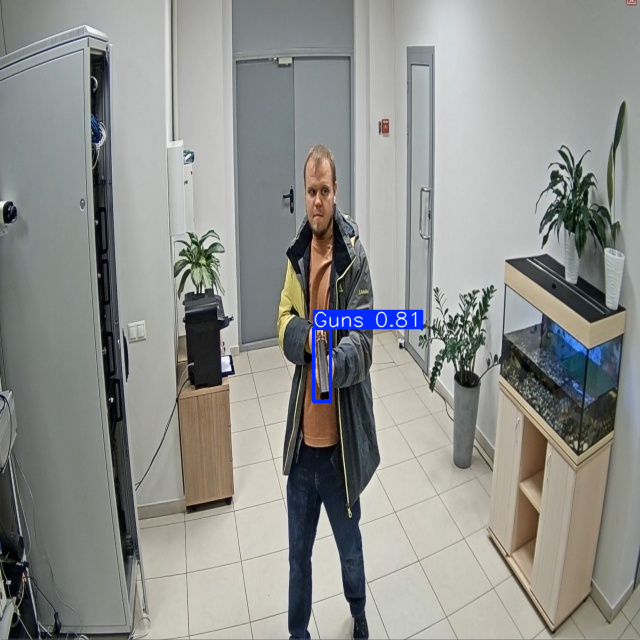

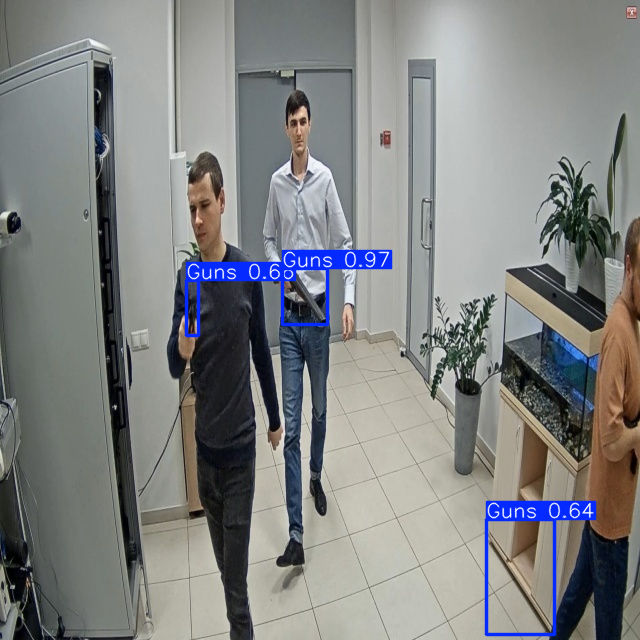

In [38]:
for result in predictions:
    result.show()